In [3]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os


In [8]:
import warnings
warnings.filterwarnings("ignore")
warnings.simplefilter(action = "ignore", category =FutureWarning)

pd.set_option("display.max_columns", None)
pd.options.display.float_format = "{:.4f}".format

In [10]:
df = pd.read_csv("cookie_cats.csv")

In [11]:
df.head()

,userid,version,sum_gamerounds,retention_1,retention_7
0,116,gate_30,3,False,False
1,337,gate_30,38,True,False
2,377,gate_40,165,True,False
3,483,gate_40,1,False,False
4,488,gate_40,179,True,True


In [12]:
df.describe()

,userid,sum_gamerounds
count,9.018900e+04,90189.000000
mean,4.998412e+06,51.872457
std,2.883286e+06,195.050858
min,1.160000e+02,0.000000
25%,2.512230e+06,5.000000
50%,4.995815e+06,16.000000
75%,7.496452e+06,51.000000
max,9.999861e+06,49854.000000


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90189 entries, 0 to 90188
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   userid          90189 non-null  int64 
 1   version         90189 non-null  object
 2   sum_gamerounds  90189 non-null  int64 
 3   retention_1     90189 non-null  bool  
 4   retention_7     90189 non-null  bool  
dtypes: bool(2), int64(2), object(1)
memory usage: 2.2+ MB


In [16]:
df.groupby("version").count()

,userid,sum_gamerounds,retention_1,retention_7
version,,,,
gate_30,44700,44700,44700,44700
gate_40,45489,45489,45489,45489


In [22]:
print(np.percentile(df["sum_gamerounds"], 90))
print(np.percentile(df["sum_gamerounds"], 85))
print(np.percentile(df["sum_gamerounds"], 80))

134.0
92.0
67.0


In [27]:
plot_df =df.groupby("sum_gamerounds")["userid"].count()

In [28]:
plot_df.head(100)

sum_gamerounds
0     3994
1     5538
2     4606
3     3958
4     3629
      ... 
95     161
96     135
97     137
98     139
99     133
Name: userid, Length: 100, dtype: int64

Text(0.5, 0, 'раунды')

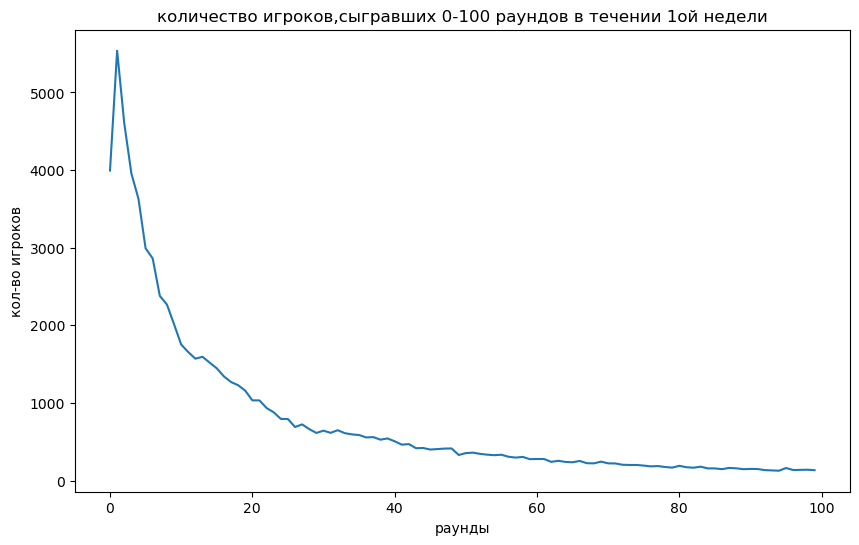

In [30]:
ax = plot_df[:100].plot(figsize = (10,6))
ax.set_title("количество игроков,сыгравших 0-100 раундов в течении 1ой недели")
ax.set_ylabel("кол-во игроков")
ax.set_xlabel("раунды")

In [33]:
df["retention_1"].sum() / df['retention_1'].count() * 100


44.52095044850259

In [35]:
df.groupby("version")["retention_1"].mean() * 100

version
gate_30    44.818792
gate_40    44.228275
Name: retention_1, dtype: float64

<AxesSubplot:ylabel='Density'>

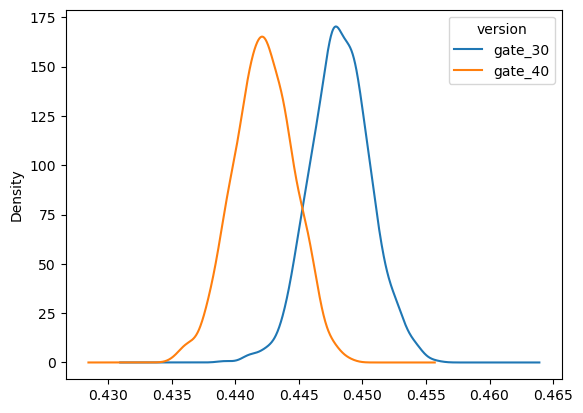

In [37]:
boot_1d = []
for i in range(1000):
    boot_mean = df.sample(frac = 1, replace = True).groupby("version")["retention_1"].mean()
    boot_1d.append(boot_mean)

boot_1d = pd.DataFrame(boot_1d)

boot_1d.plot(kind = "density")

In [41]:
boot_1d["diff"] = (boot_1d["gate_30"] - boot_1d["gate_40"]) / boot_1d.gate_40 * 100

In [46]:
boot_1d

version,gate_30,gate_40,diff
retention_1,0.449254,0.440916,1.891092
retention_1,0.450613,0.440145,2.378230
retention_1,0.445506,0.444963,0.121977
retention_1,0.447728,0.445201,0.567737
retention_1,0.447568,0.441544,1.364215
...,...,...,...
retention_1,0.445761,0.439478,1.429794
retention_1,0.447774,0.442531,1.184769
retention_1,0.450101,0.443437,1.502817
retention_1,0.449682,0.439944,2.213472


Вероятность, что 1-day retention больше у gate-30:  0.961


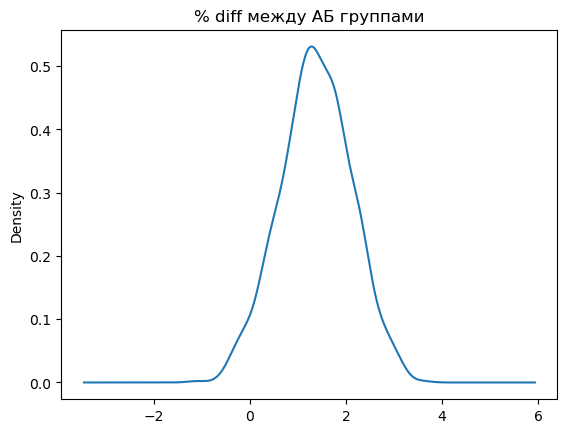

In [49]:
ax = boot_1d['diff'].plot(kind = 'density')
ax.set_title("% diff между АБ группами")
print("Вероятность, что 1-day retention больше у gate-30: ", (boot_1d['diff'] > 0).mean())

In [52]:
df.groupby("version")['retention_7'].mean() 

version
gate_30    0.190201
gate_40    0.182000
Name: retention_7, dtype: float64

In [56]:
boot_7d = []
for i in range(500):
    boot_mean = df.sample(frac = 1, replace = True).groupby("version")["retention_7"].mean()
    boot_7d.append(boot_mean)

boot_7d = pd.DataFrame(boot_7d)

boot_7d["diff"] = (boot_7d.gate_30 - boot_7d.gate_40)

In [60]:
boot_7d["diff"] = (boot_7d.gate_30 - boot_7d.gate_40)/ boot_7d.gate_40  * 100
boot_7d

version,gate_30,gate_40,diff
retention_7,0.191098,0.184418,3.622701
retention_7,0.191202,0.183293,4.314836
retention_7,0.190218,0.182929,3.984835
retention_7,0.190091,0.182824,3.974973
retention_7,0.189154,0.180471,4.811104
...,...,...,...
retention_7,0.191131,0.181397,5.366101
retention_7,0.188901,0.181936,3.828108
retention_7,0.191024,0.180751,5.683537
retention_7,0.192830,0.181141,6.453062


Вероятность, что 7-day retention больше у gate-30:  0.998


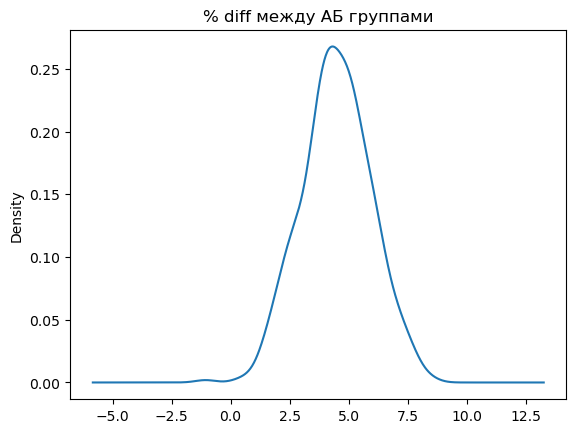

In [61]:
ax = boot_7d["diff"].plot(kind = 'density')
ax.set_title("% diff между АБ группами")
print("Вероятность, что 7-day retention больше у gate-30: ", (boot_7d['diff'] > 0).mean())

In [62]:
Вывод: gate_30 имеет больший retention rate как по 7 дневным показателям, так и однодневным. Поэтому, имеет выгоду оставить gate_30, отвергнув тем самым изменения 40-го уровня

SyntaxError: invalid syntax (99649870.py, line 1)